In [1]:
import pickle 

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold 
from sklearn import svm

from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, precision_recall_curve, f1_score, roc_auc_score
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils.class_weight import compute_class_weight


In [2]:
with open('df.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,NoShow,LeadTime,DayOfWeek,Minutes,Age,Male,PreviousNoShows,TotalScheduled,NoShowRatio,LastAppointmentScripts
2,0.0,0.0,3.0,60.0,28,1.0,0.0,0.0,0.0,0.0
3,0.0,13.0,2.0,60.0,39,0.0,0.0,0.0,0.0,0.0
4,1.0,7.0,3.0,60.0,5,1.0,0.0,3.0,0.0,0.0
6,0.0,3.0,6.0,60.0,10,1.0,0.0,0.0,0.0,0.0
7,0.0,7.0,3.0,60.0,16,1.0,0.0,2.0,0.0,0.0


In [4]:
pd.options.display.max_rows = 4000
df.groupby('NoShow').describe().transpose()

NoShow                                  0.0            1.0
LeadTime               count  807907.000000  193707.000000
                       mean       14.814583      16.802346
                       std        13.473582      12.906513
                       min         0.000000       0.000000
                       25%         5.000000       7.000000
                       50%        12.000000      14.000000
                       75%        22.000000      25.000000
                       max        61.000000      61.000000
DayOfWeek              count  807907.000000  193707.000000
                       mean        3.864645       3.802707
                       std         1.328690       1.340140
                       min         1.000000       1.000000
                       25%         3.000000       3.000000
                       50%         4.000000       4.000000
                       75%         5.000000       5.000000
                       max         7.000000       7.000000
Minutes                count  807907.000000  193707.000000
                       mean       58.858185      51.519176
                       std        41.943929      21.243628
                       min         0.000000       0.000000
                       25%        60.000000      40.000000
                       50%        60.000000      60.000000
                       75%        60.000000      60.000000
                       max      1440.000000     540.000000
Age                    count  807907.000000  193707.000000
                       mean       29.438965      29.733969
                       std        17.809373      15.588926
                       min        -7.000000      -7.000000
                       25%        14.000000      17.000000
                       50%        26.000000      28.000000
                       75%        43.000000      40.000000
                       max       119.000000     118.000000
Male                   count  807907.000000  193707.000000
                       mean        0.443748       0.400321
                       std         0.496826       0.489965
                       min         0.000000       0.000000
                       25%         0.000000       0.000000
                       50%         0.000000       0.000000
                       75%         1.000000       1.000000
                       max         1.000000       1.000000
PreviousNoShows        count  807907.000000  193707.000000
                       mean       10.672922      12.255634
                       std        17.886168      19.017146
                       min         0.000000       0.000000
                       25%         1.000000       1.000000
                       50%         4.000000       5.000000
                       75%        13.000000      15.000000
                       max       269.000000     267.000000
TotalScheduled         count  807907.000000  193707.000000
                       mean      186.677234     108.885683
                       std       374.554775     232.914787
                       min         0.000000       0.000000
                       25%         9.000000       9.000000
                       50%        39.000000      28.000000
                       75%       175.000000      92.000000
                       max      5444.000000    5396.000000
NoShowRatio            count  807907.000000  193707.000000
                       mean        0.109448       0.190622
                       std         0.136516       0.167442
                       min         0.000000       0.000000
                       25%         0.006608       0.054878
                       50%         0.062500       0.161290
                       75%         0.162258       0.289324
                       max         1.000000       1.000000
LastAppointmentScripts count  807907.000000  193707.000000
                       mean        0.347425       0.411565
                       std         1.161347    

# Exploratory Data Analysis 

In [5]:
df.NoShow.value_counts(normalize=True) ##about 20% of patients won't show up

0.0    0.806605
1.0    0.193395
Name: NoShow, dtype: float64

In [6]:
df.describe()

,NoShow,LeadTime,DayOfWeek,Minutes,Age,Male,PreviousNoShows,TotalScheduled,NoShowRatio,LastAppointmentScripts
count,1.001614e+06,1.001614e+06,1.001614e+06,1.001614e+06,1.001614e+06,1.001614e+06,1.001614e+06,1.001614e+06,1.001614e+06,1.001614e+06
mean,1.933949e-01,1.519901e+01,3.852667e+00,5.743886e+01,2.949602e+01,4.353493e-01,1.097901e+01,1.716327e+02,1.251465e-01,3.598292e-01
std,3.949601e-01,1.338882e+01,1.331136e+00,3.891958e+01,1.740245e+01,4.958029e-01,1.812118e+01,3.529804e+02,1.465687e-01,1.179158e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.000000e+00,3.000000e+00,6.000000e+01,1.500000e+01,0.000000e+00,1.000000e+00,9.000000e+00,1.204819e-02,0.000000e+00
50%,0.000000e+00,1.300000e+01,4.000000e+00,6.000000e+01,2.600000e+01,0.000000e+00,4.000000e+00,3.600000e+01,7.692307e-02,0.000000e+00
75%,0.000000e+00,2.200000e+01,5.000000e+00,6.000000e+01,4.200000e+01,1.000000e+00,1.300000e+01,1.540000e+02,1.904762e-01,0.000000e+00
max,1.000000e+00,6.100000e+01,7.000000e+00,1.440000e+03,1.190000e+02,1.000000e+00,2.690000e+02,5.444000e+03,1.000000e+00,4.600000e+01


In [7]:
df_eda = df.copy()

In [8]:
### https://towardsdatascience.com/attribute-relevance-analysis-in-python-iv-and-woe-b5651443fc04
### referencing this articles for WoE and IV 

In [9]:
### Binning categorical data 

df_eda['Age_bins'] = pd.qcut(df_eda['Age'],10, duplicates='drop')
df_eda['DayOfWeek_bins'] = pd.qcut(df_eda['DayOfWeek'],7, duplicates='drop')
df_eda['LeadTime_bins'] = pd.qcut(df_eda['LeadTime'],5, duplicates='drop')
df_eda['PreviousNoShows_bins'] = pd.qcut(df_eda['PreviousNoShows'], 4, duplicates = 'drop')
df_eda['TotalScheduled_bins'] = pd.qcut(df_eda['TotalScheduled'], 4, duplicates = 'drop')


In [10]:
df_eda.drop(columns=['Age', 'Minutes', 'NoShowRatio', 'DayOfWeek', 
                     'LeadTime', 'PreviousNoShows', 'TotalScheduled', 
                     'LastAppointmentScripts'], inplace=True)

In [11]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Show': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'No_show': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_show'] = dset['Show'] / dset['Show'].sum()
    dset['Distr_no_show'] = dset['No_show'] / dset['No_show'].sum()
    dset['WoE'] = np.log(dset['Distr_show'] / dset['Distr_no_show'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_show'] - dset['Distr_no_show']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [12]:
for col in df_eda.columns:
    if col == 'NoShow': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df_woe_iv, iv = calculate_woe_iv(df_eda, col, 'NoShow')
        print(df_woe_iv)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: Male
   Value     All    Show  No_show  Distr_show  Distr_no_show       WoE  \
1    0.0  565562  449400   116162    0.556252       0.599679 -0.075173   
0    1.0  436052  358507    77545    0.443748       0.400321  0.102990   

         IV  
1  0.003265  
0  0.004473  
IV score: 0.01


WoE and IV for column: Age_bins
            Value     All    Show  No_show  Distr_show  Distr_no_show  \
0    (26.0, 32.0]  105721   78645    27076    0.097344       0.139778   
6    (21.0, 26.0]   94625   71009    23616    0.087893       0.121916   
7    (32.0, 38.0]   89328   67591    21737    0.083662       0.112216   
1    (38.0, 46.0]  103484   80809    22675    0.100023       0.117058   
5    (16.0, 21.0]  102206   81184    21022    0.100487       0.108525   
8    (46.0, 55.0]  101018   82346    18672    0.101925       0.096393   
2  (-7.001, 10.0]  121506  102731    18775    0.127157       0.096925   
3    (13.0, 16.0]   95747   81435    14312    0.100797       0.073885   
9

In [13]:
df = df[['Age','PreviousNoShows', 'TotalScheduled','LeadTime', 'NoShow']]

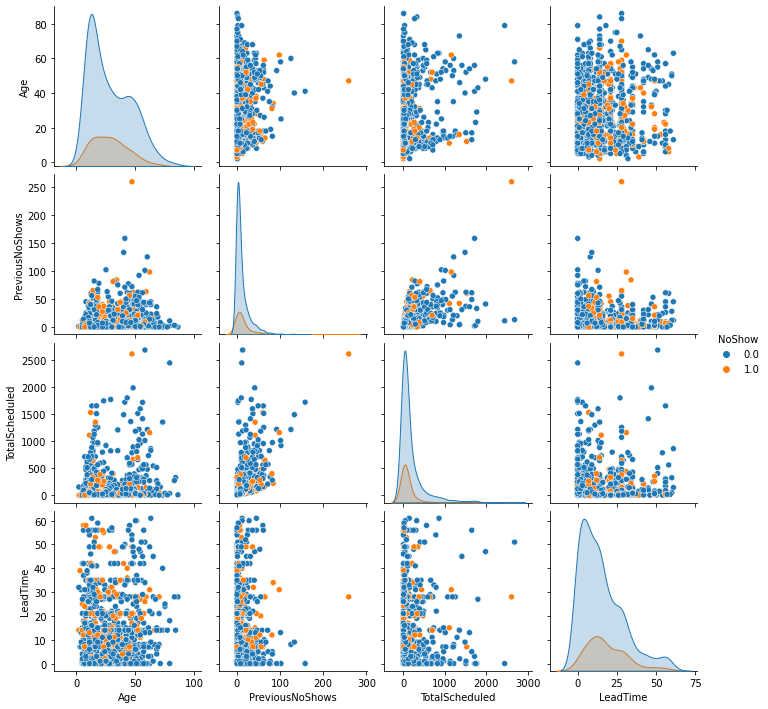

In [19]:
sns.pairplot(df.sample(1000), hue='NoShow', diag_kind='kde')

In [16]:
df.corr()

,Age,PreviousNoShows,TotalScheduled,LeadTime,NoShow
Age,1.000000,0.149331,0.110522,0.015276,0.006695
PreviousNoShows,0.149331,1.000000,0.535732,-0.075532,0.034496
TotalScheduled,0.110522,0.535732,1.000000,-0.068465,-0.087043
LeadTime,0.015276,-0.075532,-0.068465,1.000000,0.058638
NoShow,0.006695,0.034496,-0.087043,0.058638,1.000000


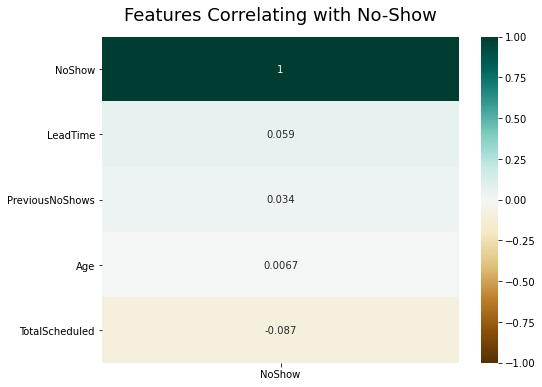

In [18]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr()[['NoShow']].sort_values(by='NoShow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with No-Show', fontdict={'fontsize':18}, pad=16)
plt.yticks(rotation = 0) # fix y axis label positioning
plt.show(heatmap)

# Train-Test Split 

In [ ]:
X, y = df.drop(['no_show'],axis=1), df['no_show'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
X_train, y_train = np.array(X_train), np.array(y_train) 
kf = KFold(n_splits=5, shuffle=True, random_state = 19)

In [ ]:
### calculating class weights because of imbalanced dataset, but the non-weighted models performed better 

# classes = [0,1]
# cw = compute_class_weight('balanced', classes, df.no_show)
# cw

Models used:
1) Logistic Regression
2) K-nearest Neighbour (hyperparameters tuned using RandomSearchCV)
3) SVM with radial kernel trick (eventually gave up on this because my laptop was unable to handle computing probabilities) 
4) Naive Bayes 

## Log Regression

Accuracy: 0.8158131433151314 <p>
Recall: 0.133765111575112 <p>
Precision: 0.6955719204501621 <p>
AUC: 0.5596017387021316 <p>

In [ ]:
log_accuracy = []
log_recall = []
log_precision = []
log_roc_auc = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val] 
    
    log_reg = LogisticRegression(solver= 'liblinear')
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    log_reg.fit(scaled_X_trainfold, y_trainfold)
    #y_predict = (log_reg.predict_proba(scaled_X_valfold)[:,1] > 0.22)
    y_predict = log_reg.predict(scaled_X_valfold)
    log_accuracy.append(accuracy_score(y_valfold, y_predict))
    log_recall.append(recall_score(y_valfold, y_predict))
    log_precision.append(precision_score(y_valfold, y_predict))
    log_roc_auc.append(roc_auc_score(y_valfold,y_predict))

In [ ]:
print(np.mean(log_accuracy))
print(np.mean(log_recall))
print(np.mean(log_precision))
print(np.mean(log_roc_auc))

In [ ]:
with open("log_reg.pkl", "wb") as f:
    pickle.dump(log_reg, f)

## K-Nearest Neighbour

Accuracy: 0.8190247270984538 <p>
Recall: 0.18928845564958027 <p>
Precision: 0.6589771876195176 <p>
ROC: 0.5824781354129602 <p> 

### RandomizedSearchCV for tuning hyperparameters

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

k_range = list(range(1, 31))
param_dist = dict(n_neighbors=k_range)
rand = RandomizedSearchCV(knn, param_dist, cv=3, scoring='accuracy', verbose=2, random_state=42, n_jobs = -1)
rand.fit(scaled_X_train, y_train)

rand.best_params_

### KNN model using RandomizedSearchCV best parameters

In [ ]:
knn_accuracy = []
knn_recall = []
knn_precision = []
knn_roc_auc = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    knn = KNeighborsClassifier(n_neighbors=29) ###seting optimum to an odd number 
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    knn.fit(scaled_X_trainfold, y_trainfold)
    y_predict = knn.predict(scaled_X_valfold)
    
    knn_accuracy.append(accuracy_score(y_valfold, y_predict))
    knn_recall.append(recall_score(y_valfold, y_predict))
    knn_precision.append(precision_score(y_valfold, y_predict))
    knn_roc_auc.append(roc_auc_score(y_valfold,y_predict))
        
    

In [ ]:
print(np.mean(knn_accuracy))
print(np.mean(knn_recall))
print(np.mean(knn_precision))
print(np.mean(knn_roc_auc))

In [ ]:
with open("knn.pkl", "wb") as f:
    pickle.dump(knn, f)

## Support Vector Machine

### RandomizedSearchCV for tuning hyperparameters

reference: https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

svm_random_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]} #'class_weight':[{0:0.62550473,1:2.49195678}]}

svm_random = RandomizedSearchCV(estimator = svm.SVC(kernel ='rbf'), param_distributions = svm_random_grid,
                                n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
svm_random.fit(scaled_X_train, y_train)
svm_random.best_params_

### SVM Radial using RandomizedSearchCV best parameters

Accuracy: 0.821654277792908 <p>
Recall: 0.1535268532949164 <p> 
Precision: 0.7578844329944994 <p>
AUC: 0.57067542143612

In [ ]:
svmrbf_accuracy = []
svmrbf_recall = []
svmrbf_precision = []
svmrbf_roc_auc = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    svm_rbf = svm.SVC(kernel="rbf", gamma=0.1, C=10, probability = True)
    svm_rbf.fit(scaled_X_trainfold, y_trainfold)
    
    y_predict = svm_rbf.predict(scaled_X_valfold)
    
    svmrbf_accuracy.append(accuracy_score(y_valfold, y_predict))
    svmrbf_recall.append(recall_score(y_valfold, y_predict))
    svmrbf_precision.append(precision_score(y_valfold, y_predict))
    svmrbf_roc_auc.append(roc_auc_score(y_valfold, y_predict))

In [ ]:
print(np.mean(svmrbf_accuracy))
print(np.mean(svmrbf_recall))
print(np.mean(svmrbf_precision))
print(np.mean(svmrbf_roc_auc))

In [ ]:
with open("svm_rbf.pkl", "wb") as f:
    pickle.dump(svm_rbf, f)

### SVM Radial with class weight using RandomizedSearchCV best params for class weight 

Accuracy: 0.7988117838491379 <p>
Recall: 0.16890676075436756 <p> 
Precision: 0.5501785181618126 <p>
AUC: 

In [ ]:
svmrbfcw_accuracy = []
svmrbfcw_recall = []
svmrbfcw_precision = []
svmrbfcw_roc_auc = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    svm_rbfcw = svm.SVC(kernel="rbf", gamma=0.01, C=0.001, class_weight = {0:0.62550473,1:2.49195678}) 
    svm_rbfcw.fit(scaled_X_trainfold, y_trainfold)
    
    y_predict = svm_rbfcw.predict(scaled_X_valfold)
    
    svmrbfcw_accuracy.append(accuracy_score(y_valfold, y_predict))
    svmrbfcw_recall.append(recall_score(y_valfold, y_predict))
    svmrbfcw_precision.append(precision_score(y_valfold, y_predict))
    svmrbfcw_roc_auc.append(roc_auc_score(y_valfold, y_predict))

In [ ]:
print(np.mean(svmrbfcw_accuracy))
print(np.mean(svmrbfcw_recall))
print(np.mean(svmrbfcw_precision))
print(np.mean(svmrbfcw_roc_auc))

# Naive Bayes 

Accuracy: 0.814086945060836 <p>
Recall: 0.1997979921113334 <p>
Precision: 0.6002664846978236 <p>
AUC: 0.583335933076093

In [ ]:
nb_accuracy = []
nb_recall = []
nb_precision = []
nb_roc_auc = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    nb = GaussianNB()
    nb.fit(scaled_X_trainfold, y_trainfold)

    y_predict = nb.predict(scaled_X_valfold)
    
    nb_accuracy.append(accuracy_score(y_valfold, y_predict))
    nb_recall.append(recall_score(y_valfold, y_predict))
    nb_precision.append(precision_score(y_valfold, y_predict))
    nb_roc_auc.append(roc_auc_score(y_valfold, y_predict))


In [ ]:
print(np.mean(nb_accuracy))
print(np.mean(nb_recall))
print(np.mean(nb_precision))
print(np.mean(nb_roc_auc))

In [ ]:
with open("nb.pkl", "wb") as f:
    pickle.dump(nb, f)

## Random Forest

### RandomizedSearchCV for tuning hyperparameters

reference: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

random_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
              'class_weight':[{0:0.62550473,1:2.49195678}]}
 
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier() , scoring = 'accuracy', param_distributions = random_grid
                               , n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(scaled_X_train, y_train)
rf_random.best_params_

In [ ]:
rf_random.best_estimator_

### Randomforest using RandomizedSearchCV best parameters

Accuracy: 0.8249662752586012 <p>
Recall: 0.16894635563896582 <p> 
Precision: 0.7794004157029264 <p>
AUC: 0.5785734817445194

In [ ]:
rf_accuracy = []
rf_recall = []
rf_precision = []
rf_roc_auc = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    rf = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 2, 
                                max_features = 'sqrt', max_depth = 10, n_jobs = -1)
    rf.fit(scaled_X_trainfold, y_trainfold)

    y_predict = rf.predict(scaled_X_valfold)
    
    rf_accuracy.append(accuracy_score(y_valfold, y_predict))
    rf_recall.append(recall_score(y_valfold, y_predict))
    rf_precision.append(precision_score(y_valfold, y_predict))
    rf_roc_auc.append(roc_auc_score(y_valfold, y_predict))

In [ ]:
print(np.mean(rf_accuracy))
print(np.mean(rf_recall))
print(np.mean(rf_precision))
print(np.mean(rf_roc_auc))

In [ ]:
with open("rf.pkl", "wb") as f:
    pickle.dump(rf, f)

### RandomForest with class weight using RandomizedSearchCV best params for class weight 

Accuracy: 0.7878117460940285 <p>
Recall: 0.34327949214184883 <p> 
Precision: 0.45657089201211465 <p>
AUC: 

In [ ]:
rfcw_accuracy = []
rfcw_recall = []
rfcw_precision = []
rfcw_roc_auc = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    rfcw = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 2, 
                              max_features = 'sqrt', max_depth = 10, class_weight= {0:0.62550473,1:2.49195678}, n_jobs = -1)
   
    rfcw.fit(scaled_X_trainfold, y_trainfold)

    y_predict = rf.predict(scaled_X_valfold)
    
    rfcw_accuracy.append(accuracy_score(y_valfold, y_predict))
    rfcw_recall.append(recall_score(y_valfold, y_predict))
    rfcw_precision.append(precision_score(y_valfold, y_predict))
    rfcw_roc_auc.append(roc_auc_score(y_valfold, y_predict))

In [ ]:
print(np.mean(rfcw_accuracy))
print(np.mean(rfcw_recall))
print(np.mean(rfcw_precision))
print(np.mean(rfcw_roc_auc))

# Choosing between models 

In [ ]:
with open("log_reg.pkl", "rb") as f:
    log_reg = pickle.load(f)

with open("nb.pkl", "rb") as f:
    nb = pickle.load(f)

with open("knn.pkl", "rb") as f:
    knn = pickle.load(f)

with open("rf.pkl", "rb") as f:
    rf = pickle.load(f)

In [ ]:
### create train and validation set to plot ROC curves
X, y = df.drop(['no_show'],axis=1), df['no_show'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=44)
X_train, y_train, X_val, y_val = np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

reference: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [log_reg, nb, knn, rf]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(scaled_X_train, y_train)
    yproba = model.predict_proba(scaled_X_val)[::,1]
    
    fpr, tpr, _ = roc_curve(y_val,  yproba)
    auc = roc_auc_score(y_val, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
#Plot the figure
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
fig.savefig('multiple_roc_curve.png', dpi=300)

Let's go with randomforest!

## Threshold Tuning

In [ ]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, rf.predict_proba(scaled_X_train)[:,1] )

fig = plt.figure(figsize=(8,6))
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.title('Precision and Recall Curves');

In [ ]:
fig.savefig('precision_recall_curve.png', dpi=300)

In [ ]:
### curves appear to taper off at about 0.4 threshold 
y_predict = (rf.predict_proba(scaled_X_val)[:, 1] >= 0.20).astype('int')
print(classification_report(y_val, y_predict))

## Retrain and Test

In [ ]:
### create train and test sets
X, y = df.drop(['no_show'],axis=1), df['no_show'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
### re-training on 80% of data 
rf.fit(scaled_X_train, y_train)
y_predict = (rf.predict_proba(scaled_X_test)[:, 1] >= 0.4).astype('int')

In [ ]:
print(classification_report(y_test, y_predict))

# Inspecting RF

In [ ]:
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)

In [ ]:
feature_importance

In [ ]:
df_noshow = df[df['no_show']==1]
df_show = df[df['no_show']==0]

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.distplot(df_show["age"] , color="grey", label="Show", hist = False)
sns.distplot(df_noshow["age"] , color="#bd0026", label="No Show", hist = False)
sns.despine()
plt.legend()
fig.savefig('age.png', dpi=300)

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.distplot( df_show["day_difference"] , color="grey", label="Show", hist=False)
sns.distplot( df_noshow["day_difference"] , color="#bd0026", label="No Show", hist=False)
sns.despine()
plt.legend()
fig.savefig('day_difference.png', dpi=300)

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.distplot( df_show["prior_noshows"] , color="grey", label="Show", hist=False)
sns.distplot( df_noshow["prior_noshows"] , color="#bd0026", label="No Show", hist=False)
sns.despine()
plt.legend()
fig.savefig('day_difference.png', dpi=300)